# 2019-12-06_95p-confidence_binary.csv

In [1]:
import pandas as pd
from collections import Counter, defaultdict
from tqdm.notebook import tqdm
import sys
import time
start_time = time.time()

url = 'https://raw.githubusercontent.com/heeh/legal_issue_classification/master/2019-12-06_95p-confidence_binary.csv'
df = pd.read_csv(url)

/Users/heeh/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [157]:
df.info()
df.iloc[:,:4]
df = df.loc[:, df.sum(axis=0, skipna=True) != 0] # Remove columns that have zero sums

df["colsum"] = df.sum(axis = 0, skipna = True)
oldCols = list(df.columns)
newCols = []
for i,x in colsum[2:].items():
#    if x >= 10:
#        newCols.append(i)
    newCols.append(i)
cols = oldCols[:2] + newCols
df = df[cols]

<class 'pandas.core.frame.DataFrame'>
Index: 2778 entries, 0 to colsum
Data columns (total 88 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             2778 non-null   object 
 1   full_text       2778 non-null   object 
 2   BE-00-00-00-00  1849 non-null   float64
 3   BE-04-00-00-00  1966 non-null   float64
 4   BU-00-00-00-00  1591 non-null   float64
 5   CO-00-00-00-00  1165 non-null   float64
 6   CR-00-00-00-00  1680 non-null   float64
 7   CR-01-00-00-00  1394 non-null   float64
 8   CR-04-00-00-00  1403 non-null   float64
 9   CR-06-00-00-00  1405 non-null   float64
 10  CR-07-00-00-00  1404 non-null   float64
 11  CR-10-00-00-00  1970 non-null   float64
 12  CR-14-00-00-00  1402 non-null   float64
 13  CR-15-00-00-00  1405 non-null   float64
 14  ED-00-00-00-00  1814 non-null   float64
 15  ED-03-00-00-00  1968 non-null   float64
 16  EN-00-00-00-00  1710 non-null   float64
 17  ES-00-00-00-00  1945 non-null   floa

In [99]:
import matplotlib.pyplot as plt
import numpy as np
colsum_dict = defaultdict()

for col in df.columns[2:]:
    colsum_dict[col]= df[col].sum()


cat_dict = defaultdict()
for k,v in colsum_dict.items():
    if k[3:5] == "00":
        cat_dict[k[0:5]] = v
        
cat_dict = {k:v for k,v in sorted(cat_dict.items(), key=lambda kv: kv[1], reverse=True)}
print(cat_dict)
keys = list(cat_dict.keys())[:10]
values = list(cat_dict.values())[:10]

from prettytable import PrettyTable

t = PrettyTable()
t.field_names = ["Label", "Value", "Ratio(%)"]
t.align["Label"] = "c"
t.align["Value"] = "r"
t.align["Ratio(%)"] = "r"

sumCls = sum(cat_dict.values())
for k,v in cat_dict.items():
    ratio = np.round(v/sumCls*100,2)
    t.add_row([k, v, ratio])

print(t)

{'HO-00': 1100.0, 'WO-00': 774.0, 'MO-00': 732.0, 'FA-00': 714.0, 'CR-00': 604.0, 'TR-00': 520.0, 'TO-00': 460.0, 'HE-00': 244.0, 'CO-00': 212.0, 'BU-00': 186.0, 'ES-00': 156.0, 'IM-00': 72.0, 'BE-00': 54.0, 'ED-00': 48.0, 'RI-00': 44.0, 'GO-00': 26.0, 'EN-00': 10.0, 'VE-00': 8.0, 'NA-00': 2.0}
+-------+--------+----------+
| Label |  Value | Ratio(%) |
+-------+--------+----------+
| HO-00 | 1100.0 |    18.44 |
| WO-00 |  774.0 |    12.97 |
| MO-00 |  732.0 |    12.27 |
| FA-00 |  714.0 |    11.97 |
| CR-00 |  604.0 |    10.12 |
| TR-00 |  520.0 |     8.72 |
| TO-00 |  460.0 |     7.71 |
| HE-00 |  244.0 |     4.09 |
| CO-00 |  212.0 |     3.55 |
| BU-00 |  186.0 |     3.12 |
| ES-00 |  156.0 |     2.61 |
| IM-00 |   72.0 |     1.21 |
| BE-00 |   54.0 |     0.91 |
| ED-00 |   48.0 |      0.8 |
| RI-00 |   44.0 |     0.74 |
| GO-00 |   26.0 |     0.44 |
| EN-00 |   10.0 |     0.17 |
| VE-00 |    8.0 |     0.13 |
| NA-00 |    2.0 |     0.03 |
+-------+--------+----------+


In [138]:
import matplotlib.pyplot as plt# Pie chart


def drawPie(keys, values): 
    plt.pie(values, labels=keys, autopct='%1.1f%%', startangle=90, pctdistance=0.85)#draw circle
    centre_circle = plt.Circle((0,0),0.50,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right', ncol=1)
    plt.show()

defaultdict(None, {'BE': defaultdict(None, {'00': 54.0, '04': 14.0}), 'BU': defaultdict(None, {'00': 186.0}), 'CO': defaultdict(None, {'00': 212.0}), 'CR': defaultdict(None, {'00': 604.0, '01': 24.0, '04': 26.0, '06': 22.0, '07': 10.0, '10': 22.0, '14': 6.0, '15': 12.0}), 'ED': defaultdict(None, {'00': 48.0, '03': 4.0}), 'EN': defaultdict(None, {'00': 10.0}), 'ES': defaultdict(None, {'00': 156.0, '01': 20.0, '02': 16.0, '03': 26.0, '04': 12.0, '05': 10.0, '06': 6.0, '07': 8.0}), 'FA': defaultdict(None, {'00': 714.0, '01': 4.0, '02': 4.0, '04': 18.0, '05': 20.0, '06': 20.0, '07': 82.0, '08': 4.0, '09': 8.0, '10': 16.0, '11': 10.0, '12': 4.0, '14': 6.0, '15': 8.0}), 'GO': defaultdict(None, {'00': 26.0}), 'HE': defaultdict(None, {'00': 244.0, '06': 2.0, '07': 2.0}), 'HO': defaultdict(None, {'00': 1100.0, '01': 2.0, '02': 10.0, '04': 10.0, '05': 14.0, '06': 68.0, '07': 4.0, '08': 2.0, '09': 54.0}), 'IM': defaultdict(None, {'00': 72.0}), 'MO': defaultdict(None, {'00': 732.0, '02': 24.0, '06

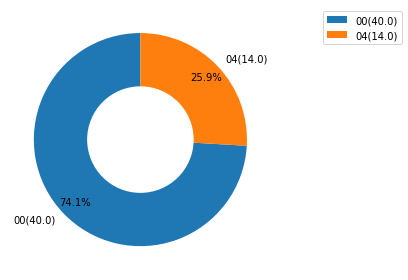

BU


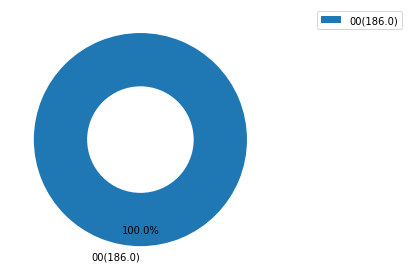

CO


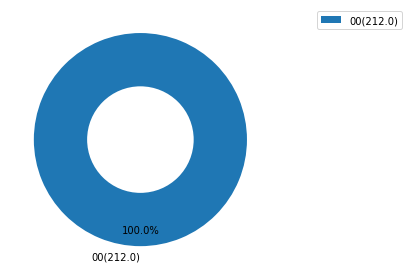

CR


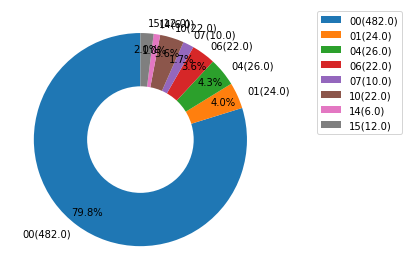

ED


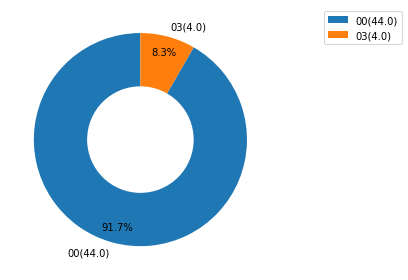

EN


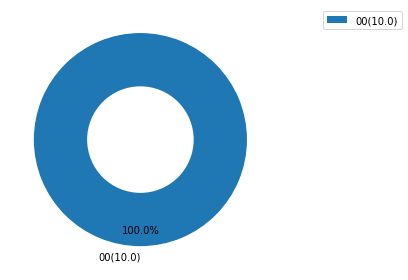

ES


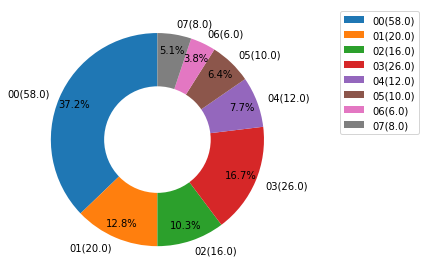

FA


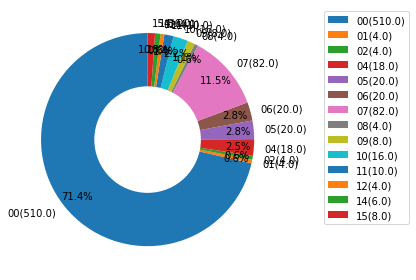

GO


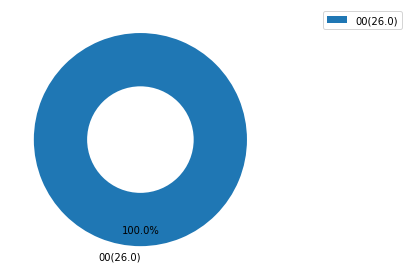

HE


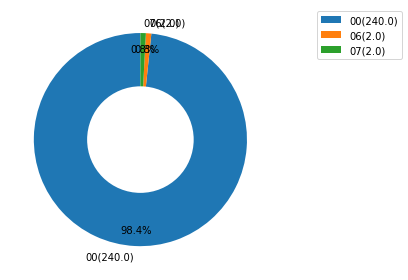

HO


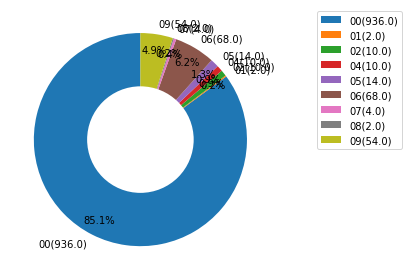

IM


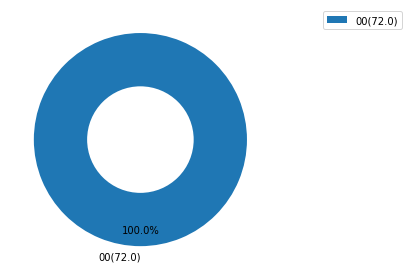

MO


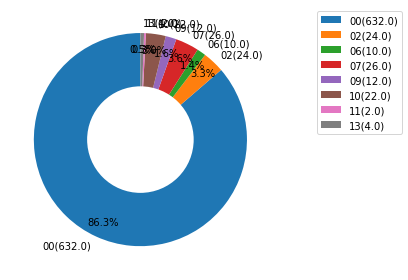

NA


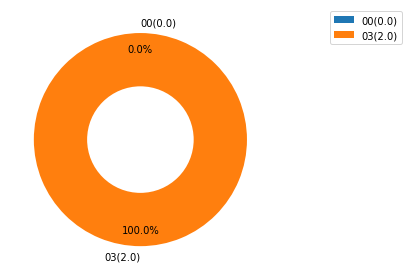

RI


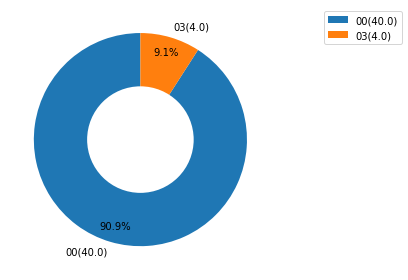

TO


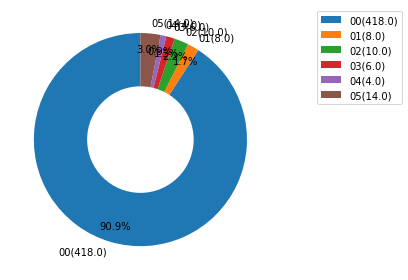

TR


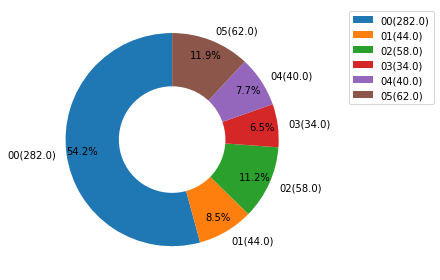

VE


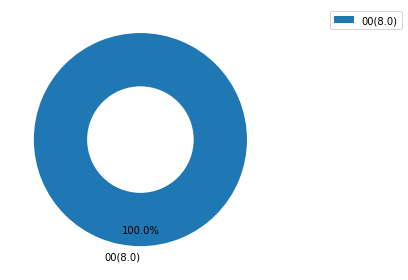

WO


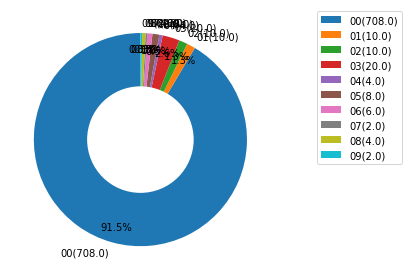

defaultdict(None, {'WO': 774.0, 'BE': 54.0, 'BU': 186.0, 'CO': 212.0, 'CR': 604.0, 'ED': 48.0, 'EN': 10.0, 'ES': 156.0, 'FA': 714.0, 'GO': 26.0, 'HE': 244.0, 'HO': 1100.0, 'IM': 72.0, 'MO': 732.0, 'NA': 2.0, 'RI': 44.0, 'TO': 460.0, 'TR': 520.0, 'VE': 8.0})


In [165]:
keys = list(colsum_dict.keys())
vals = list(colsum_dict.values())
len_= len(keys)

nested_dict = defaultdict()

hi_list = []
lo_list = []

for i in range(len_):
    hi = keys[i][0:2]
    lo = keys[i][3:5]

    if hi not in nested_dict:
        nested_dict[hi] = defaultdict()
    nested_dict[hi][lo] = vals[i]

print(nested_dict)

for k,v in nested_dict.items():
    losum = 0
    for lo in v.keys():
        if lo != "00":
            losum += v[lo]
    print(losum)
    sum_dict[k] = nested_dict[k]["00"]
    nested_dict[k]["00"] = nested_dict[k]["00"] - losum

    
for hi in nested_dict.keys():
    print(hi)
    keys = list(nested_dict[hi].keys())
    vals = list(nested_dict[hi].values())
    kvs = []
    for i in range(len(keys)):
        kvs.append(keys[i] + "(" + str(vals[i]) + ")")
    drawPie(kvs, vals)

print(sum_dict)
       
        

In [2]:

verbose = False
def preprocessing(dfset: defaultdict, cls: str):
    dfset[cls] = df.loc[:, ['_id', 'full_text', cls]]
    labels = dfset[cls].iloc[:,2]
    if verbose:
        print("------------Before dropping nan----------------------------------------")
        print(dfset[cls].iloc[:,1:])
        print(labels.value_counts(dropna=False))
    
    dfset[cls] = dfset[cls].dropna()
    labels = dfset[cls].iloc[:,2]
    if verbose:
        print("\n------------After dropping nan---------------------------------------")
        print(dfset[cls].iloc[:,1:])
        print(labels.value_counts(dropna=False))

print("DONE")

DONE


In [5]:
dfset = defaultdict() 
class_list = df.columns[2:].tolist()

for cls in tqdm(class_list):
    preprocessing(dfset, cls)

In [154]:
from prettytable import PrettyTable
    


In [192]:
#Q. How many classes and subclasses?

colsum = df.sum(axis = 0, skipna = True)
rowsum_seq = df.sum(axis = 1, skipna = True)
ct = Counter()
for i in range(rowsum_seq.size):
    rs = rowsum_seq[i]
    ct[rs] += 1
print(ct)

def countCategory(rowSum: int):
    all_super = 0 
    contains_sub = 0

    for i in range(rowsum_seq.size):
        rs = rowsum_seq[i]
        ct[rs] += 1

        if rs == rowSum:
    #        print(rs)
    #        print(df.iloc[i,1])
            flag = False
            for colname, colval in df.iloc[i].iteritems():
                if colval == 1.0:
                    if colname[3:5] != "00":
                        flag = True
            if flag:
                contains_sub += 1
            else:
                all_super += 1
                
    t.add_row([rowSum, all_super + contains_sub, all_super, contains_sub])
    return cat,sub

t = PrettyTable()
t.field_names = ["rowSum", "All", "No Sub Classes", "Contains Sub Classes"]
t.align["All"] = "r"
t.align["No Sub Classes"] = "r"
t.align["Contains Sub Classes"] = "r"
for i in range(1,9):

    countCategory(i)
print(t)

Counter({1.0: 1696, 0.0: 441, 2.0: 405, 3.0: 161, 4.0: 47, 5.0: 16, 7.0: 5, 6.0: 5, 8.0: 1})
+--------+------+----------------+----------------------+
| rowSum |  All | No Sub Classes | Contains Sub Classes |
+--------+------+----------------+----------------------+
|   1    | 1696 |           1696 |                    0 |
|   2    |  405 |            298 |                  107 |
|   3    |  161 |             55 |                  106 |
|   4    |   47 |              6 |                   41 |
|   5    |   16 |              1 |                   15 |
|   6    |    5 |              1 |                    4 |
|   7    |    5 |              0 |                    5 |
|   8    |    1 |              0 |                    1 |
+--------+------+----------------+----------------------+


In [196]:
#Q. Does subclass always include its superclass?

import sys
cls_chk_dict = defaultdict()
def buildCategory(rowSum: int):
#    print(f"Rowsum: {rowSum}")
    cat = 0 
    sub = 0
    
    cls_chk = []
    for i in range(rowsum_seq.size):
        rs = rowsum_seq[i]
        ct[rs] += 1
        if rs == rowSum:
            chk = []
    #        print(rs)
    #        print(df.iloc[i,1])
            for colname, colval in df.iloc[i].iteritems():
                if colval == 1.0:
                    chk.append(colname[:5])
            cls_chk.append(chk)
    return cls_chk

for i in range(1,9):
    cls_chk_dict[i] = buildCategory(i)
    

t = PrettyTable()
t.field_names = ["rowSum", "Contains Sub Classes", "Contains Super Classes", "No Super Classes"]
t.align["rowSum"] = "c"
t.align["Contains Sub Classes"] = "r"
t.align["Contains Super Classes"] = "r"
t.align["No Super Classes"] = "r"

for rowSum in range(1,9):
    contains_sup = 0
    not_contains_sup = 0
    print(f"-----------------------------------\nrowSum:{rowSum}")
    len_ = len(cls_chk_dict[rowSum])
    temp = []

    num_subs = 0
    for i in range(len(cls_chk_dict[rowSum])):
        rec = cls_chk_dict[rowSum][i]
        flag = False
        has_subs = False
        for cls in rec:
            if getSub(cls) != "00":
                has_subs = True
                if getClass(cls) + "-00" not in rec:
                    flag = True
                    break
        if has_subs:
            num_subs += 1
            if flag:
                not_contains_sup += 1
                temp.append(rec)    
            else:
                contains_sup += 1
            
    t.add_row([rowSum, num_subs, contains_sup, not_contains_sup])

    for x in temp:
        print(x)
    print()


print(t)

-----------------------------------
rowSum:1

-----------------------------------
rowSum:2

-----------------------------------
rowSum:3
['ES-03', 'FA-00', 'IM-00']
['ES-00', 'HE-00', 'MO-02']
['CR-10', 'FA-00', 'IM-00']

-----------------------------------
rowSum:4

-----------------------------------
rowSum:5
['CR-00', 'HE-00', 'MO-02', 'RI-00', 'TO-00']

-----------------------------------
rowSum:6
['CR-00', 'CR-01', 'CR-06', 'CR-10', 'FA-07', 'WO-00']
['CR-00', 'CR-04', 'CR-06', 'CR-10', 'FA-07', 'WO-00']

-----------------------------------
rowSum:7
['CR-00', 'CR-10', 'ES-03', 'FA-00', 'FA-05', 'FA-06', 'FA-07']
['CR-00', 'CR-01', 'CR-04', 'CR-06', 'CR-10', 'FA-07', 'TR-00']

-----------------------------------
rowSum:8

+--------+----------------------+------------------------+------------------+
| rowSum | Contains Sub Classes | Contains Super Classes | No Super Classes |
+--------+----------------------+------------------------+------------------+
|   1    |                    

# Findings

* Subclass $\Rightarrow$ Superclass (except 8 records)
* Already Labeled

# TODO
* Exclude 8 records from the training data?
* Add superclasses to 8 records?
* In any case, re-run
* Classes less than 10?